Eine Raumklima Analyse anhand einer Clusteranalyse mit dem K-Means Verfahren

Als erstes werden die benötigten Bibliotheken importiert:
Bibliotheken: 
- Pandas 
- Matplotlib 
- Seaborn
- NumPy
Zusätzlich den Befehl: %matplotlib inline <- Bewirkt: Das die Plots innerhalb des Notizbuches erzeugt werden.

In [2]:
 import matplotlib.pyplot as plt   
 import seaborn as sns; sns.set()  
 import numpy as np  
 import pandas as pd 
 import scipy.cluster.hierarchy as shc  
 from sklearn.cluster import KMeans 
 from sklearn.cluster import AgglomerativeClustering 
 %matplotlib inline 

Es gibt eine CSV Datei mit den verschiedenen Raumklimas. Diese muss zuerst importiert werden.
Die Daten werden in die Variable klima_data gespeichert.

In [3]:
 # Lese CSV-Datei ein 
 klima_data = pd.read_csv('raumklima.csv',sep=';', header=0)  
 
 # Merkmale/Variablen Feuchtigk. und Temp. separat speichern
 X = klima_data.iloc[:,[0,1]].copy() 
 
 # Wahre Zuordnung zu den Kategorien speichern
 cluster_true=klima_data.iloc[:,2].copy() 
 
 # Zeige ausgewählte Zeilen zur Kontrolle an 
 klima_data.head(10)

,Feuchte,Temp,Cluster
0,42,21,behaglich
1,45,19,behaglich
2,52,19,behaglich
3,55,21,behaglich
4,53,22,behaglich
5,69,23,zu feucht
6,80,21,zu feucht
7,81,23,zu feucht
8,73,25,zu feucht
9,75,25,zu feucht


Mit der Matplotlib Bibliothek (plt) können die Daten visualisiert werden in einem Diagramm.

<class 'numpy.ndarray'>


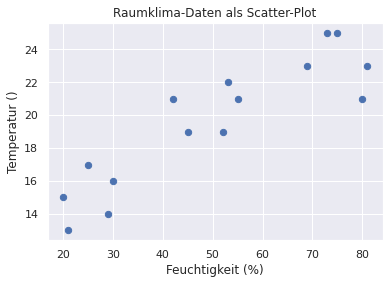

In [4]:
 X = np.array(X) # Typkonvertierung: DataFrame->Array  
 print(type(X))  
 # Daten visualisieren  
 plt.scatter(X[:,0], X[:,1],s=40);  
 plt.title('Raumklima-Daten als Scatter-Plot')  
 plt.xlabel('Feuchtigkeit (%)');plt.ylabel('Temperatur ()');  

Die Clusteranalyse wird mittels der KMeans-Funktion aus dem sklearn.cluster-Paket der scikit-learn-Bibliothek durchgeführt.
Anschliessend wird das array ausgegeben

In [5]:
 #Anzahl der Zentren festlegen
 kmeans = KMeans(n_clusters=3) 
 
 # Vorhersage mittels K-Means-Verfahren
 kmeans.fit(X)
 y_kmeans = kmeans.predict(X)
 
 # vorhergesagte Zuordnungen der Merkmalskombinationen zu den geschätzten Zentren
 y_kmeans

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

Nun werden die Daten den 3 verschiedenen Clustern zugewiesen.

Merkmalswerte der Zentren:
[[75.6 23.4]
 [25.  15. ]
 [49.4 20.4]]


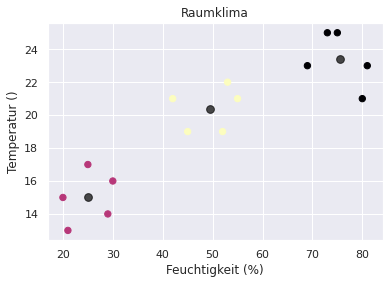

In [6]:
 # Daten visualisieren: Merkmale
 plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=40, cmap='magma')
 
 # Daten visualisieren: Zentren
 centers = kmeans.cluster_centers_
 plt.scatter(centers[:, 0], centers[:, 1], c='black', s=60, alpha=0.7);
 
 plt.title("Raumklima")
 plt.xlabel('Feuchtigkeit (%)');plt.ylabel('Temperatur ()'); 
 
 # Merkmalswerte der Zentren ausgeben
 print('Merkmalswerte der Zentren:')  
 print(centers)  

Clusteranalyse mittels Hierachierschem Modell anhand eines Dendogrammes

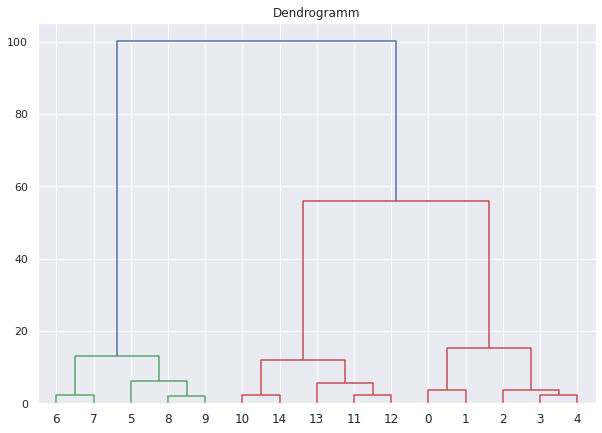

In [7]:
 plt.figure(figsize=(10, 7))
 plt.title("Dendrogramm")
 dend = shc.dendrogram(shc.linkage(X, method='ward'))

Die detaillierte Clusteranalyse wird mittels der AgglomerativeClustering aus dem sklearn.cluster-Paket der scikit-learn-Bibliothek durchgeführt. 


In [8]:
 # hierarchisches Modell festlegen, inkl. Anzahl der Cluster
 cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
 
 # Vorhersage mittels des hierarchischen Modells
 cluster = cluster.fit(X)
 y_cluster = cluster.fit_predict(X)
 
 # vorhergesagte Zuordnungen der Merkmalskombinationen zu den geschätzten Zentren
 y_cluster #or:
 # print(cluster.labels_)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

Das Ergebnis der Clusteranalyse, d.h. die Zuordnung der Beobachtungen zu den drei möglichen Zentren/Clustern, wird als Plot dargestellt. 

Text(0, 0.5, 'Temperatur(Celsius)')

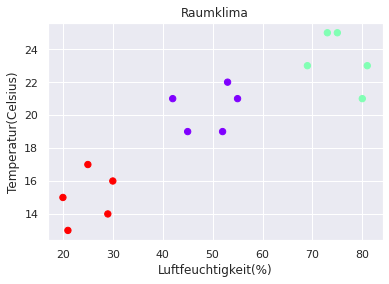

In [9]:
 # Daten visualisieren: Merkmale
 plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, s=40, cmap='rainbow')
 
 plt.title("Raumklima")
 plt.xlabel("Luftfeuchtigkeit(%)")
 plt.ylabel("Temperatur(Celsius)")